Import der benötigten Module. Das Modul "ecgdetectors" wird zuerst heruntergeladen und installiert.

In [5]:
#from google.colab import files
import csv
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import scipy
import hrv
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree

#!pip install py-ecg-detectors
from ecgdetectors import Detectors

import preprocess

Hauptteil des Codes: Berechnung der Features für alle EKG-Daten und zuordnung zu Normal / Vorhofflimmern

In [ ]:
silence_warnings=True
fs = 300                      # Sampling-Frequenz 300 Hz
hrz = hrv.HRV(fs)
detectors = Detectors(fs)     # Initialisierung des QRS-Detektors
sdnn_normal = np.array([])    # Initialisierung der Feature-Arrays
sdnn_afib = np.array([])
mdnn_normal = np.array([])
mdnn_afib = np.array([])
rrskew_normal = np.array([])
rrskew_afib = np.array([])
rrkurt_normal = np.array([])
rrkurt_afib = np.array([])
sdsd_normal = np.array([])
sdsd_afib = np.array([])
hr_normal = np.array([])
hr_afib = np.array([])
rmssd_normal = np.array([])
rmssd_afib = np.array([])
sdann_normal = np.array([])
sdann_afib = np.array([])
pNN20_normal = np.array([])
pNN20_afib = np.array([])
pNN50_normal = np.array([])
pNN50_afib = np.array([])
NN20_normal = np.array([])
NN20_afib = np.array([])
NN50_normal = np.array([])
NN50_afib = np.array([])
with open('training/REFERENCE.csv') as csv_file:      # Einlesen der Liste mit Dateinamen und Zuordnung
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
      data = sio.loadmat('training/'+row[0]+'.mat')   # Import der EKG-Dateien
      ecg_lead = data['val'][0]
      ecg_lead = preprocess.ecg_denoise_kalman(ecg_lead)
      r_peaks = detectors.pan_tompkins_detector(ecg_lead)     # Detektion der QRS-Komplexe
      #print(len(r_peaks))
      sdnn = np.std(np.diff(r_peaks)/fs*1000) 
      mdnn = np.mean(np.diff(r_peaks)/fs*1000)            # Berechnung der Standardabweichung der Schlag-zu-Schlag Intervalle (SDNN) in Millisekunden
      rrskew = scipy.stats.skew(np.diff(r_peaks)/fs*1000)
      rrkurt = scipy.stats.kurtosis(np.diff(r_peaks)/fs*1000)
      sdsd = hrz.SDSD(r_peaks)
      hr = hrz.HR(r_peaks)
      rmssd = hrz.RMSSD(r_peaks)
      if len(r_peaks)>1:
        pNN20 = hrz.pNN20(r_peaks)
        pNN50 = hrz.pNN50(r_peaks)
      else:
        pNN20 = np.nan
        pNN50 = np.nan
      NN20 = hrz.NN20(r_peaks)
      NN50 = hrz.NN50(r_peaks)
      #sdann = hrz.SDANN(r_peaks)
      if row[1]=='N':
        sdnn_normal = np.append(sdnn_normal,sdnn)         # Zuordnung zu "Normal"
        mdnn_normal = np.append(mdnn_normal, mdnn)
        rrskew_normal = np.append(rrskew_normal, rrskew)
        rrkurt_normal = np.append(rrkurt_normal, rrkurt)
        sdsd_normal = np.append(sdsd_normal, sdsd)
        hr_normal = np.append(hr_normal, hr)
        rmssd_normal = np.append(rmssd_normal, rmssd)
        pNN20_normal = np.append(pNN20_normal, pNN20)
        pNN50_normal = np.append(pNN50_normal, pNN50)
        NN20_normal = np.append(NN20_normal, NN20)
        NN50_normal = np.append(NN50_normal, NN50)
        #sdann_normal = np.append(sdann_normal, sdann)
      if row[1]=='A':
        sdnn_afib = np.append(sdnn_afib,sdnn)             # Zuordnung zu "Vorhofflimmern"
        mdnn_afib = np.append(mdnn_afib, mdnn)
        rrskew_afib = np.append(rrskew_afib, rrskew)
        rrkurt_afib = np.append(rrkurt_afib, rrkurt)
        sdsd_afib = np.append(sdsd_afib, sdsd)
        hr_afib = np.append(hr_afib, hr)
        rmssd_afib = np.append(rmssd_afib, rmssd)
        pNN20_afib = np.append(pNN20_afib, pNN20)
        pNN50_afib = np.append(pNN50_afib, pNN50)
        NN20_afib = np.append(NN20_afib, NN20)
        NN50_afib = np.append(NN50_afib, NN50)
        #sdann_afib = np.append(sdann_afib, sdann)
      line_count = line_count + 1
      if (line_count % 100)==0:
        print(str(line_count) + "\t Dateien wurden verarbeitet.")

100	 Dateien wurden verarbeitet.
200	 Dateien wurden verarbeitet.
300	 Dateien wurden verarbeitet.
400	 Dateien wurden verarbeitet.
500	 Dateien wurden verarbeitet.
600	 Dateien wurden verarbeitet.
700	 Dateien wurden verarbeitet.
800	 Dateien wurden verarbeitet.
900	 Dateien wurden verarbeitet.
1000	 Dateien wurden verarbeitet.


/opt/tljh/user/lib/python3.9/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/tljh/user/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/tljh/user/lib/python3.9/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/tljh/user/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/tljh/user/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Visualisierung der Features

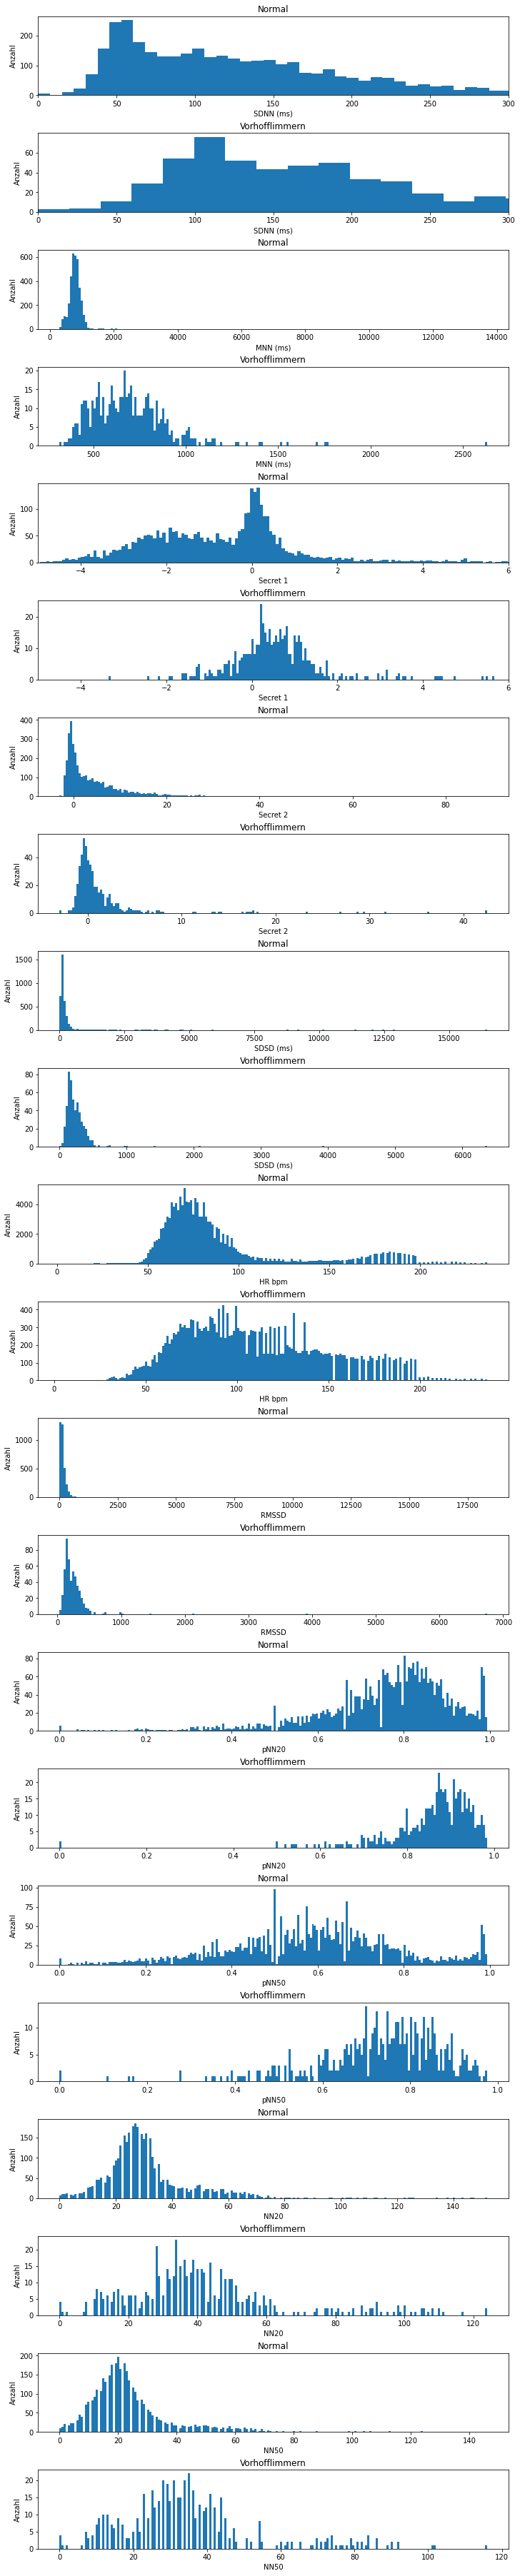

In [3]:
fig, axs = plt.subplots(22,1, constrained_layout=True, figsize=(10,50))
axs[0].hist(sdnn_normal,2000)
axs[0].set_xlim([0, 300])
axs[0].set_title("Normal")
axs[0].set_xlabel("SDNN (ms)")
axs[0].set_ylabel("Anzahl")

axs[1].hist(sdnn_afib,300)
axs[1].set_xlim([0, 300])
axs[1].set_title("Vorhofflimmern")
axs[1].set_xlabel("SDNN (ms)")
axs[1].set_ylabel("Anzahl")


axs[2].hist(mdnn_normal,200)
#axs[2].set_xlim([0, 1500])
axs[2].set_title("Normal")
axs[2].set_xlabel("MNN (ms)")
axs[2].set_ylabel("Anzahl")

axs[3].hist(mdnn_afib,200)
#axs[3].set_xlim([0, 1500])
axs[3].set_title("Vorhofflimmern")
axs[3].set_xlabel("MNN (ms)")
axs[3].set_ylabel("Anzahl")

axs[4].hist(rrskew_normal,200)
axs[4].set_xlim([-5, 6])
axs[4].set_title("Normal")
axs[4].set_xlabel("Secret 1")
axs[4].set_ylabel("Anzahl")

axs[5].hist(rrskew_afib,200)
axs[5].set_xlim([-5, 6])
axs[5].set_title("Vorhofflimmern")
axs[5].set_xlabel("Secret 1")
axs[5].set_ylabel("Anzahl")

axs[6].hist(rrkurt_normal,200)
#axs[6].set_xlim([0, 1500])
axs[6].set_title("Normal")
axs[6].set_xlabel("Secret 2")
axs[6].set_ylabel("Anzahl")

axs[7].hist(rrkurt_afib,200)
#axs[7].set_xlim([0, 1500])
axs[7].set_title("Vorhofflimmern")
axs[7].set_xlabel("Secret 2")
axs[7].set_ylabel("Anzahl")

axs[8].hist(sdsd_normal,200)
#axs[8].set_xlim([0, 1500])
axs[8].set_title("Normal")
axs[8].set_xlabel("SDSD (ms)")
axs[8].set_ylabel("Anzahl")

axs[9].hist(sdsd_afib,200)
#axs[9].set_xlim([0, 1500])
axs[9].set_title("Vorhofflimmern")
axs[9].set_xlabel("SDSD (ms)")
axs[9].set_ylabel("Anzahl")

axs[10].hist(hr_normal,200)
#axs[10].set_xlim([0, 1500])
axs[10].set_title("Normal")
axs[10].set_xlabel("HR bpm")
axs[10].set_ylabel("Anzahl")

axs[11].hist(hr_afib,200)
#axs[11].set_xlim([0, 1500])
axs[11].set_title("Vorhofflimmern")
axs[11].set_xlabel("HR bpm")
axs[11].set_ylabel("Anzahl")

axs[12].hist(rmssd_normal,200)
#axs[12].set_xlim([0, 1500])
axs[12].set_title("Normal")
axs[12].set_xlabel("RMSSD")
axs[12].set_ylabel("Anzahl")

axs[13].hist(rmssd_afib,200)
#axs[13].set_xlim([0, 1500])
axs[13].set_title("Vorhofflimmern")
axs[13].set_xlabel("RMSSD")
axs[13].set_ylabel("Anzahl")

axs[14].hist(pNN20_normal,200)
#axs[14].set_xlim([0, 1500])
axs[14].set_title("Normal")
axs[14].set_xlabel("pNN20")
axs[14].set_ylabel("Anzahl")

axs[15].hist(pNN20_afib,200)
#axs[15].set_xlim([0, 1500])
axs[15].set_title("Vorhofflimmern")
axs[15].set_xlabel("pNN20")
axs[15].set_ylabel("Anzahl")

axs[16].hist(pNN50_normal,200)
#axs[16].set_xlim([0, 1500])
axs[16].set_title("Normal")
axs[16].set_xlabel("pNN50")
axs[16].set_ylabel("Anzahl")

axs[17].hist(pNN50_afib,200)
#axs[17].set_xlim([0, 1500])
axs[17].set_title("Vorhofflimmern")
axs[17].set_xlabel("pNN50")
axs[17].set_ylabel("Anzahl")

axs[18].hist(NN20_normal,200)
#axs[18].set_xlim([0, 1500])
axs[18].set_title("Normal")
axs[18].set_xlabel("NN20")
axs[18].set_ylabel("Anzahl")

axs[19].hist(NN20_afib,200)
#axs[19].set_xlim([0, 1500])
axs[19].set_title("Vorhofflimmern")
axs[19].set_xlabel("NN20")
axs[19].set_ylabel("Anzahl")

axs[20].hist(NN50_normal,200)
#axs[20].set_xlim([0, 1500])
axs[20].set_title("Normal")
axs[20].set_xlabel("NN50")
axs[20].set_ylabel("Anzahl")

axs[21].hist(NN50_afib,200)
#axs[21].set_xlim([0, 1500])
axs[21].set_title("Vorhofflimmern")
axs[21].set_xlabel("NN50")
axs[21].set_ylabel("Anzahl")

plt.show()

Bestimmung des optimalen Schwellwertes anhand des F1-Scores

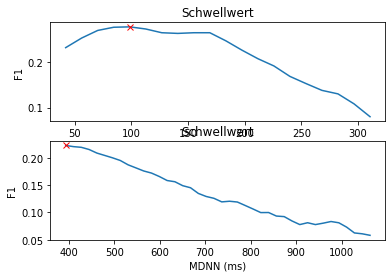

In [5]:
sdnn_total = np.append(sdnn_normal,sdnn_afib) # Kombination der beiden SDNN-Listen
p05 = np.nanpercentile(sdnn_total,5)          # untere Schwelle
p95 = np.nanpercentile(sdnn_total,95)         # obere Schwelle
thresholds_s = np.linspace(p05, p95, num=20)    # Liste aller möglichen Schwellwerte
F1_s = np.array([])
for th in thresholds_s:
  TP = np.sum(sdnn_afib>=th)                  # Richtig Positiv
  TN = np.sum(sdnn_normal<th)                 # Richtig Negativ
  FP = np.sum(sdnn_normal>=th)                # Falsch Positiv
  FN = np.sum(sdnn_afib<th)                   # Falsch Negativ
  F1_s = np.append(F1_s, TP / (TP + 1/2*(FP+FN))) # Berechnung des F1-Scores

th_opt_s=thresholds_s[np.argmax(F1_s)]              # Bestimmung des Schwellwertes mit dem höchsten F1-Score

mdnn_total = np.append(mdnn_normal,mdnn_afib) # Kombination der beiden MDNN-Listen
p05 = np.nanpercentile(mdnn_total,1)          # untere Schwelle
p95 = np.nanpercentile(mdnn_total,95)         # obere Schwelle
thresholds_m = np.linspace(p05, p95, num=40)    # Liste aller möglichen Schwellwerte
F1_m = np.array([])
for th in thresholds_m:
  TP = np.sum(mdnn_afib>=th)                  # Richtig Positiv
  TN = np.sum(mdnn_normal<th)                 # Richtig Negativ
  FP = np.sum(mdnn_normal>=th)                # Falsch Positiv
  FN = np.sum(mdnn_afib<th)                   # Falsch Negativ
  F1_m = np.append(F1_m, TP / (TP + 1/2*(FP+FN))) # Berechnung des F1-Scores

th_opt_m=thresholds_m[np.argmax(F1_m)]              # Bestimmung des Schwellwertes mit dem höchsten F1-Score

fig, ax = plt.subplots(2,1)
ax[0].plot(thresholds_s,F1_s)
ax[0].plot(th_opt_s,F1_s[np.argmax(F1_s)],'xr')
ax[0].set_title("Schwellwert")
ax[0].set_xlabel("SDNN (ms)")
ax[0].set_ylabel("F1")

ax[1].plot(thresholds_m,F1_m)
ax[1].plot(th_opt_m,F1_m[np.argmax(F1_m)],'xr')
ax[1].set_title("Schwellwert")
ax[1].set_xlabel("MDNN (ms)")
ax[1].set_ylabel("F1")
plt.show()

Visualisierung der Daten + Schwellwert

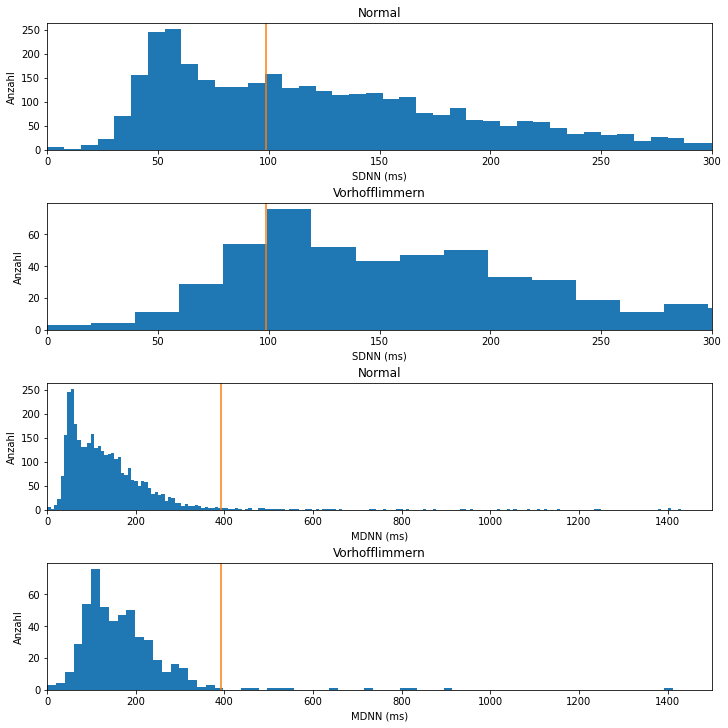

In [6]:
fig, axs = plt.subplots(4,1, constrained_layout=True, figsize=(10,10))
axs[0].hist(sdnn_normal,2000)
axs[0].set_xlim([0, 300])
tmp = axs[0].get_ylim()
axs[0].plot([th_opt_s,th_opt_s],[0,10000])
axs[0].set_ylim(tmp)
axs[0].set_title("Normal")
axs[0].set_xlabel("SDNN (ms)")
axs[0].set_ylabel("Anzahl")

axs[1].hist(sdnn_afib,300)
axs[1].set_xlim([0, 300])
tmp = axs[1].get_ylim()
axs[1].plot([th_opt_s,th_opt_s],[0,10000])
axs[1].set_ylim(tmp)
axs[1].set_title("Vorhofflimmern")
axs[1].set_xlabel("SDNN (ms)")
axs[1].set_ylabel("Anzahl")

axs[2].hist(sdnn_normal,2000)
axs[2].set_xlim([0, 1500])
tmp = axs[2].get_ylim()
axs[2].plot([th_opt_m,th_opt_m],[0,10000])
axs[2].set_ylim(tmp)
axs[2].set_title("Normal")
axs[2].set_xlabel("MDNN (ms)")
axs[2].set_ylabel("Anzahl")

axs[3].hist(sdnn_afib,300)
axs[3].set_xlim([0, 1500])
tmp = axs[3].get_ylim()
axs[3].plot([th_opt_m,th_opt_m],[0,10000])
axs[3].set_ylim(tmp)
axs[3].set_title("Vorhofflimmern")
axs[3].set_xlabel("MDNN (ms)")
axs[3].set_ylabel("Anzahl")

plt.show()

fs = 300                                                  # Sampling-Frequenz 300 Hz
detectors_t = Detectors(fs)                                 # Initialisierung des QRS-Detektors
sdnn_normal_t = np.array([])                                # Initialisierung der Feature-Arrays
sdnn_afib_t = np.array([])
mdnn_normal_t = np.array([])
mdnn_afib_t = np.array([])
with open('test/REFERENCE.csv') as csv_file:      # Einlesen der Liste mit Dateinamen und Zuordnung
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row_t in csv_reader:
      data_t = sio.loadmat('test/'+row[0]+'.mat')   # Import der EKG-Dateien
      ecg_lead_t = data_t['val'][0]
      r_peaks_t = detectors.hamilton_detector(ecg_lead_t)     # Detektion der QRS-Komplexe
      sdnn_t = np.std(np.diff(r_peaks_t)/fs*1000) 
      mdnn_t = np.mean(np.diff(r_peaks_t)/fs*1000)            # Berechnung der Standardabweichung der Schlag-zu-Schlag Intervalle (SDNN) in Millisekunden
      if row_t[1]=='N':
        sdnn_normal_t = np.append(sdnn_normal_t,sdnn_t)         # Zuordnung zu "Normal"
        mdnn_normal_t = np.append(mdnn_normal_t, mdnn_t)
      if row_t[1]=='A':
        sdnn_afib_t = np.append(sdnn_afib_t,sdnn_t)             # Zuordnung zu "Vorhofflimmern"
        mdnn_afib_t = np.append(mdnn_afib_t, mdnn_t)
      line_count = line_count + 1
      if (line_count % 2)==0:
        print(str(line_count) + "\t Dateien wurden verarbeitet.")

In [4]:
from sklearn import tree

In [2]:
import random
train_feat_n = list(zip(sdnn_normal, mdnn_normal, rrskew_normal, rrkurt_normal, sdsd_normal, hr_normal, rmssd_normal, pNN20_normal, pNN50_normal, NN20_normal, NN50_normal))
train_feat_n = list(zip(train_feat_n, [0]*len(train_feat_n)))
random.shuffle(train_feat_n)
test_feat_n = train_feat_n[int(0.8*len(train_feat_n)):len(train_feat_n)]
train_feat_n = train_feat_n[0:int(0.8*len(train_feat_n))]
train_feat_a = list(zip(sdnn_afib, mdnn_afib, rrskew_afib, rrkurt_afib, sdsd_afib, hr_afib, rmssd_afib, pNN20_afib, pNN50_afib, NN20_afib, NN50_afib))
train_feat_a = list(zip(train_feat_a, [1]*len(train_feat_n)))
random.shuffle(train_feat_a)
test_feat_a = train_feat_a[int(0.8*len(train_feat_a)):len(train_feat_a)]
train_feat_a = train_feat_a[0:int(0.8*len(train_feat_a))]
train_feat = train_feat_a + train_feat_n
test_feat = test_feat_a + test_feat_n
random.shuffle(train_feat)
random.shuffle(test_feat)
train_feat = np.array(train_feat)
test_feat = np.array(test_feat)
X = np.array(list(train_feat[:,0]), dtype='float32')
Y = np.array(list(train_feat[:,1]), dtype='float32')
X_test = np.array(list(test_feat[:,0]), dtype='float32')
Y_test = np.array(list(test_feat[:,1]), dtype='float32')
print(X)
#print(Y)
print(X.shape)
print(Y.shape)
print(X_test.shape, Y_test.shape)
print(X.dtype)

NameError: name 'sdnn_normal' is not defined

In [9]:
nans = np.where(np.isfinite(X)==False)
print(nans)
X = np.delete(X, nans, axis=0)
Y = np.delete(Y, nans)
print(X[np.where(np.isfinite(X)==False)])
print(X.shape, Y.shape)
nans_t = np.where(np.isfinite(X_test)==False)
print(nans_t)
X_test = np.delete(X_test, nans_t, axis=0)
Y_test= np.delete(Y_test, nans_t)

(array([ 147,  147,  377,  377,  377,  377,  377,  377,  377,  377,  462,
        462,  728,  728,  853,  853,  996,  996, 1394, 1394, 1394, 1394,
       1394, 1394, 1394, 1394, 1831, 1831, 1983, 1983, 1995, 1995, 2258,
       2258, 2258, 2258, 2258, 2258, 2258, 2258]), array([4, 6, 0, 1, 2, 3, 4, 6, 7, 8, 4, 6, 4, 6, 4, 6, 4, 6, 0, 1, 2, 3,
       4, 6, 7, 8, 4, 6, 4, 6, 4, 6, 0, 1, 2, 3, 4, 6, 7, 8]))
[]
(3261, 11) (3261,)
(array([], dtype=int64), array([], dtype=int64))


In [10]:
nans = np.where(np.isnan(X)==True)
print(nans)
X = np.delete(X, nans, axis=0)
Y = np.delete(Y, nans)
print(X[np.where(np.isnan(X)==True)])
print(X.shape, Y.shape)
nans_t = np.where(np.isnan(X)==True)
print(nans_t)
X_test = np.delete(X_test, nans_t, axis=0)
Y_test= np.delete(Y_test, nans_t)

(array([], dtype=int64), array([], dtype=int64))
[]
(3261, 11) (3261,)
(array([], dtype=int64), array([], dtype=int64))


In [2]:
# np.save('X.npy',X)
# np.save('Y.npy',Y)
# np.save('X_test.npy',X_test)
# np.save('Y_test.npy',Y_test)

X = np.load('X.npy')
Y = np.load('Y.npy')
X_test = np.load('X_test.npy')
Y_test = np.load('Y_test.npy')

In [ ]:
print(Y_test)

In [6]:
clf = tree.DecisionTreeClassifier(class_weight='balanced')
parameters = {'splitter':('best', 'random'),
              'criterion':('gini', 'entropy', 'log_loss'), 
              'max_depth':[4,6,8,10,12,20,100],
              'min_samples_split':[2,5,10,20]}
#gs_clf = clf.fit(X, Y)
gs_clf= GridSearchCV(clf,parameters)
gs_clf.fit(X,Y)
gs_clf.score(X_test, Y_test)

c:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
280 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 

0.9099756690997567

In [ ]:
#print(sorted(gs_clf.cv_results_.keys()))
# id_max = np.argmax(gs_clf.cv_results_['rank_test_score'])
# best_param = gs_clf.cv_results_['params'][id_max]
best_param = gs_clf.best_params_
best_param

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
grabost = GradientBoostingClassifier()
parameters = {'loss': ['exponential'], 
              'max_depth':[7,8,9],
              'n_estimators':[ 900, 1000,1100],
              'learning_rate':[0.22]
}
gs_grabost= GridSearchCV(grabost,parameters)
gs_grabost.fit(X, Y)
gs_grabost.score(X_test, Y_test)

0.9537712895377128

In [35]:
gs_grabost.best_params_
import pickle
filename = 'gs_grabost.sav'
pickle.dump(gs_grabost, open(filename, 'wb'))

In [ ]:
#optimierung der paramter

from sklearn.ensemble import GradientBoostingClassifier
grabo0st = GradientBoostingClassifier()
parameters = {'loss':('log_loss', 'exponential'), 
              'max_depth':[8,10,20,40,100, 300, 1000],
              'n_estimators':[500,1000, 1300,2000, 4000],
              'learning_rate':[0.1,0.2,0.5,0.7]
}
gs_graboost= GridSearchCV(grabost,parameters)
gs_graboost.fit(X, Y)
gs_graboost.score(X_test, Y_test)

In [8]:
gs_grabost.best_params_

{'learning_rate': 0.5,
 'loss': 'exponential',
 'max_depth': 10,
 'n_estimators': 1000}

In [16]:
from sklearn.ensemble import RandomForestClassifier

feature_names = ['SDNN', 'MNN', 'Secret 1', 'Secret 2', 'SDSD', 'HR', 'RMSSD', 'pNN20', 'pNN50', 'NN20', 'NN50'] #[f"feature {i}" for i in range(X.shape[1])]

mm = RandomForestClassifier(random_state=0, class_weight='balanced')
parameters = {'max_features':('sqrt', 'log2'),
              'criterion':('gini', 'entropy', 'log_loss'), 
              'max_depth':[4,20,100],
              'n_estimators':[30,200,1000],
              'min_samples_split':[2,5,10,20]}
gs_mm= GridSearchCV(mm,parameters)
gs_mm.fit(X,Y)
gs_mm.score(X_test, Y_test)

0.9525547445255474

In [21]:
import pickle

with open("gs_clf.pkl", "wb") as f:
    pickle.dump(gs_clf, f)

with open("gs_grabost.pkl", "wb") as f:
    pickle.dump(gs_grabost, f)

with open("gs_mm.pkl", "wb") as f:
    pickle.dump(gs_mm, f)

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("ECG") 

In [ ]:
from sklearn.inspection import permutation_importance
import time
import pandas as pd

start_time = time.time()
result = permutation_importance(
    forest, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
start_time = time.time()
importances = clf.feature_importances_
#std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

In [ ]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
frm = pd.DataFrame(X)
lbl = pd.DataFrame(Y)
frm = pd.concat([frm, lbl], axis=1)
frm.set_axis(['SDNN', 'MDNN', 'Skewness', 'Kurtosis', 'SDSD', 'HR', 'RMSSD', 'pNN20', 'pNN50', 'NN20', 'NN50', 'AFIB'], inplace=True, axis=1)
print(frm)
print(X[np.where(X==np.max(X))])

In [ ]:
import seaborn as sns
sns.pairplot(frm)

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p, normalize='true')
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True)
  plt.title('Confusion matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

plot_cm(Y_test, clf.predict(X_test))

In [ ]:
import pickle
filename = 'tree_model.sav'
#pickle.dump(clf, open(filename, 'wb'))

In [ ]:
predX = clf.predict(X)
print(len(Y))
print(len(X))
predu = list(zip(Y, predX))
predu

In [ ]:
from predict import predict_labels
from wettbewerb import load_references, save_predictions
import argparse
import time

#parser = argparse.ArgumentParser(description='Predict given Model')
#parser.add_argument('--test_dir', action='store',type=str,default='../test/')
#parser.add_argument('--model_name', action='store',type=str,default='tree_model.sav')
#args = parser.parse_args()

ecg_leads,ecg_labels,fs,ecg_names = load_references('./test') # Importiere EKG-Dateien, zugehörige Diagnose, Sampling-Frequenz (Hz) und Name                                                # Sampling-Frequenz 300 Hz

start_time = time.time()
predictions = predict_labels(ecg_leads,fs,ecg_names,model_name='tree_model.sav')
pred_time = time.time()-start_time

save_predictions(predictions) # speichert Prädiktion in CSV Datei
print("Runtime",pred_time,"s")

